# Matematična olimpijada

Pri projektni nalogi bom analiziral rezultate matematične olimpijade od leta 1984 do leta 2017.
Naštel bom nekaj začetnih vprašanj, na katere želim preko projektne nalogo odgovoriti.

Začetna vprašanja:
1. Ali se je s časom število kandidatov na tekmovanjih spremenilo?
2. Iz katerih držav je največ tekmovalcev?
3. Od osamosvojitve Slovenije, koliko je slovenskih tekmovalcev?
4. Kakšne rezultate dosegajo?
5. Izmed 6 nalog, ali katera po rešljivosti iztopa?
6. Ali uspeh tekmovalcev danes enak kot je bil pred 30 leti?






# 0. Uvod

In [3]:
import pandas as pd
projekt=pd.read_csv('rezultati.csv', index_col='year')
rezultat=pd.read_csv('rezultati.csv')
pd.options.display.max_rows=20
import matplotlib.pyplot as plt

In [4]:
projekt

,country,firstname,lastname,problem1,problem2,problem3,problem4,problem5,problem6,total,rank,award
year,,,,,,,,,,,,
1984,BGR,Diko B.,Mihov,7.0,7.0,7.0,7.0,7.0,7.0,42,1,Gold medal
1984,GDR,Karin,Gröger,7.0,7.0,7.0,7.0,7.0,7.0,42,1,Gold medal
1984,ROU,Daniel,Tătaru,7.0,7.0,7.0,7.0,7.0,7.0,42,1,Gold medal
1984,USS,Andrey,Astrelin,7.0,7.0,7.0,7.0,7.0,7.0,42,1,Gold medal
1984,USS,Konstantin,Ignatiev,7.0,7.0,7.0,7.0,7.0,7.0,42,1,Gold medal
...,...,...,...,...,...,...,...,...,...,...,...,...
2017,KEN,Beracah May,Nyang'Or,0.0,0.0,0.0,0.0,0.0,0.0,0,604,NaN
2017,MMR,Wai Yan Moe,Lwin,0.0,0.0,0.0,0.0,0.0,0.0,0,604,NaN
2017,NPL,Awanish,Khanal,0.0,0.0,0.0,0.0,0.0,0.0,0,604,NaN


# 1. Število tekmovalcev


Najprej si bomo ogledali, število tekmovalcev v določenem letu.

In [21]:
stevilo_tekmovalcev = projekt.groupby('year').size()


year
1984    192
1985    209
1986    210
1987    237
1988    268
       ... 
2013    527
2014    560
2015    577
2016    602
2017    615
Length: 34, dtype: int64

Če si ogledamo tabelico, lahko domnevamo, da število tekmovalcev skozi leta narašča.
Spodaj si oglejmo graf, ki bo prikazoval odvisnost števila tekmovalcev glede na leto tekmovanja. 

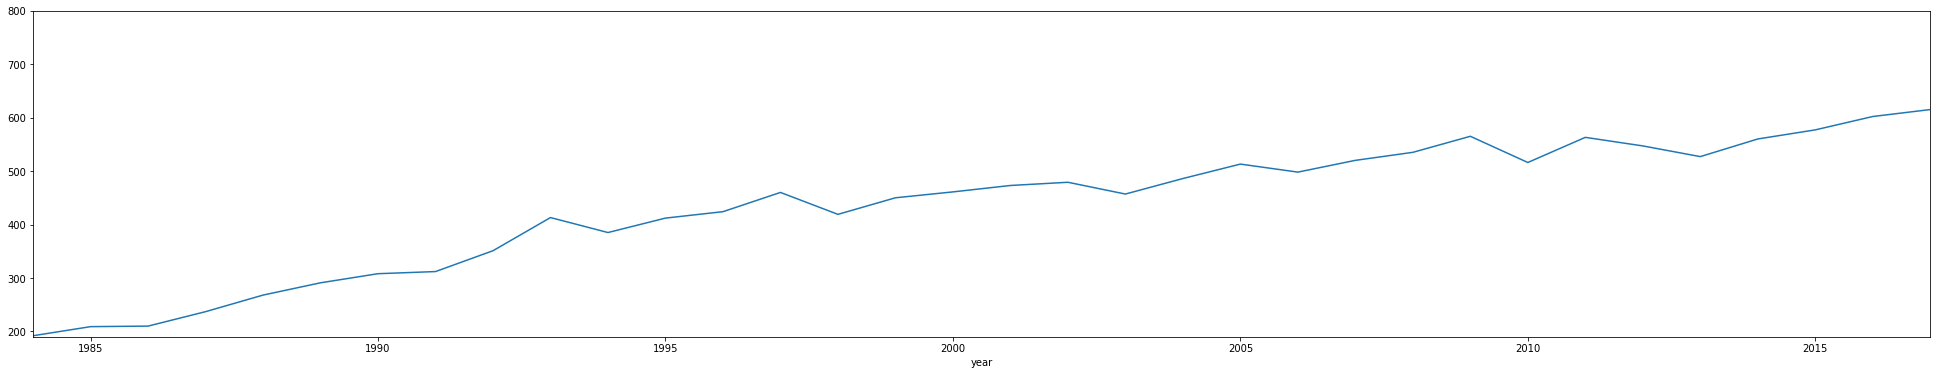

In [46]:
stevilo_tekmovalcev = projekt.groupby('year').size()
stevilo_tekmovalcev[:34].plot(figsize=(34,6), kind='line', ylim=[190,800])

Čeprav graf ne prikazuje povsod naraščajoče funkcije,je jasno, da je bila naša domneva pravilna. Spodaj zapišimo najmanjše in največje število tekmovalcev. 

In [50]:
projekt.groupby('year').size().min(), projekt.groupby('year').size().max()

(192, 615)

Vidimo, da se je od leta 1984 do leta 2017 število tekmovalcev približno za trikrat povečalo.
Ali to pomeni, da je danes matematika bolj popularna kot pred 30 leti, ali pa je danes samo več 'pametnih ljudi'?
Število 'pametnih ljudi' je zagotovo enako, po mojem mnenju so eni izmed razlogov večje število študentov, večja pobuda ter 
bše bolj uveljavno tekmovanje.


# 2. O nacionalnosti tekmovalcev

In [21]:
import pandas as pd
projekt=pd.read_csv('rezultati.csv', index_col='year')
drzave=projekt.groupby('country').size()

country
ALB    107
ALG     66
ARG    171
ARM    151
AUS    204
      ... 
UZB     91
VEN     61
VNM    204
YUG    102
ZWE      8
Length: 132, dtype: int64

Uredimo jih po velikosti.

In [25]:
drzave.sort_values(ascending=False)

country
ROU    204
AUT    204
VNM    204
BGR    204
CAN    204
      ... 
LAO      6
BEN      5
MDG      5
BRU      2
JAM      1
Length: 132, dtype: int64

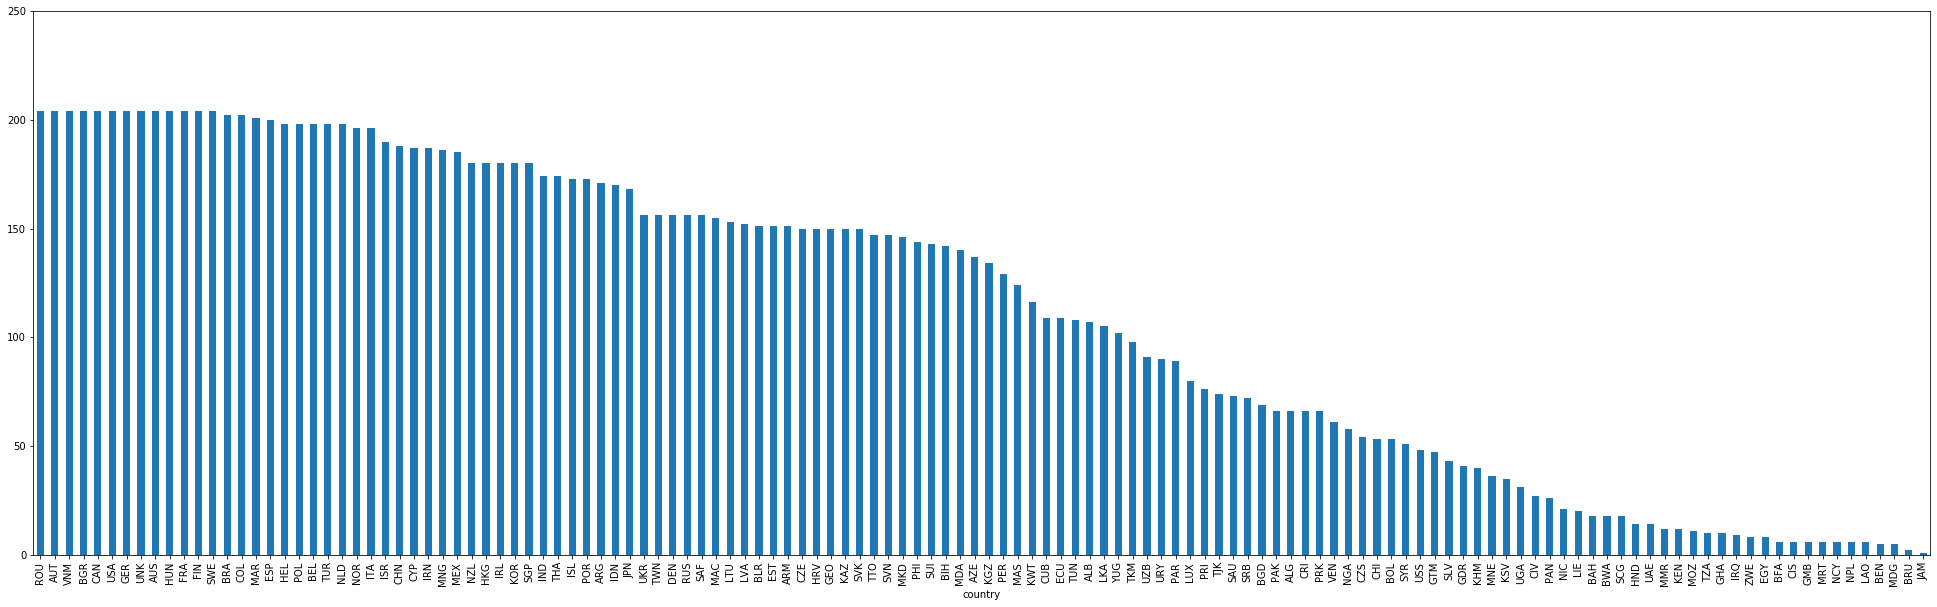

In [27]:
urejene=drzave.sort_values(ascending=False)
urejene[:132].plot(figsize=(34,10), kind='bar', ylim=[0,250])


Rezultati, razen morda za Romunijo ne presenečajo preveč, saj države z največ tekmovalci spadajo med premožnejše. 

# 3. Slovenski tekmovalci

Pogledali si bomo, kako so se na tekmovanju znašli slovenski tekmovalci po osamosvojitvi Slovenije.

In [56]:
slovenci=projekt[projekt.country=='SVN']
slovenci.count()

country      147
firstname    147
lastname     147
problem1     147
problem2     147
problem3     147
problem4     147
problem5     147
problem6     147
total        147
rank         147
award         90
dtype: int64

In [68]:
projekt[projekt.country=='SVN'].sort_values('total')


,country,firstname,lastname,problem1,problem2,problem3,problem4,problem5,problem6,total,rank,award
year,,,,,,,,,,,,
2003,SVN,Mitja,Trampuš,0.0,0.0,0.0,0.0,0.0,0.0,0,446,NaN
2013,SVN,Klara,Nosan,0.0,0.0,0.0,0.0,0.0,0.0,0,494,NaN
2003,SVN,Janoš,Vidali,0.0,0.0,0.0,0.0,0.0,0.0,0,446,NaN
2005,SVN,Sara,Kališnik,1.0,0.0,0.0,0.0,0.0,0.0,1,445,NaN
1996,SVN,Tadej,Starčič,1.0,0.0,0.0,0.0,0.0,0.0,1,392,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2006,SVN,Matjaž,Berčič,7.0,7.0,0.0,6.0,0.0,0.0,20,109,Silver medal
2004,SVN,Gašper,Zadnik,7.0,1.0,2.0,7.0,3.0,0.0,20,169,Bronze medal
1997,SVN,Matjaž,Konvalinka,4.0,0.0,7.0,4.0,7.0,0.0,22,131,Bronze medal


Vidimo, da je bilo med letom 1993 in 2017 147 slovenskih tekmovalcev. V prejšnem razdelku smo pokazali, da jih je bilo največ 204.
Če upoštevamo še tekmovalce, ki so tekmovali v času Jugoslavije bi se ta številka še bolj približali največji kvoti.
Zdaj bomo izračunali kako so v povprečju reševali posamezne naloge.

In [66]:
prva = projekt[projekt.country=='SVN']['problem1'].mean()
druga = projekt[projekt.country=='SVN']['problem2'].mean()
tretja = projekt[projekt.country=='SVN']['problem3'].mean()
cetrta = projekt[projekt.country=='SVN']['problem4'].mean()
peta = projekt[projekt.country=='SVN']['problem5'].mean()
sesta = projekt[projekt.country=='SVN']['problem6'].mean()
vse= projekt[projekt.country=='SVN']['total'].mean()
pd.DataFrame({"1.Naloga": [prva],
             "2.Naloga" : [druga],
             "3.Naloga" : [tretja],
             "4.Naloga" : [cetrta],
             "5.Naloga" : [peta],
             "6.Naloga" : [sesta],
             "Skupno"   : [vse]})

,1.Naloga,2.Naloga,3.Naloga,4.Naloga,5.Naloga,6.Naloga,Skupno
0,3.92517,1.312925,0.346939,3.129252,0.952381,0.197279,9.863946


Vidimo, da so najbolše reševali prvo nalogo in najslabše šesto, kar je povsem pričakovano, če predpostavimo, da je šesta najtežja.
V naslednjem razdelku bomo enako analizo naredili za vse tekmovalce in nakoncu primerjali rezultate.

# 4.  Katera naloga je najtežja?


Na tekmovanju je 6 nalog, vsaka vredna 7 točk. Znano je, da so vse zelo težke. V tem razdelku nas bo zanimalo, koliko točk so v povprečju čez
leta tekmovalci pridobili na nalogo.
Na podlagi rezultatov bomo, ocenili katere naloge so težje od drugih.

In [57]:
prva = projekt['problem1'].mean()
druga = projekt['problem2'].mean()
tretja = projekt['problem3'].mean()
cetrta = projekt['problem4'].mean()
peta = projekt['problem5'].mean()
sesta = projekt['problem6'].mean()

pd.DataFrame({"1.Naloga": [prva],
             "2.Naloga" : [druga],
             "3.Naloga" : [tretja],
             "4.Naloga" : [cetrta],
             "5.Naloga" : [peta],
             "6.Naloga" : [sesta]})


,1.Naloga,2.Naloga,3.Naloga,4.Naloga,5.Naloga,6.Naloga
0,4.18552,2.680396,1.120804,3.989416,2.262977,0.888162


Iz tabelice je razvidno, da je največ težav v povprečju tekmovalcem delala 3 in 6 naloga, najmanj pa 1 in 4. 

# 5. Uspešnost tekmovanja skozi leta

Zanimalo nas bo povprečni rezultat v posameznem letu. Na podlagi teh rezultatov bomo poskušali ugotoviti, kako se povprečen uspeh čez leta spreminja.
Najprej si oglejmo tabelo, ki glede na leto prikazuje povrečja pri posmezni nalogi ter povprečen rezultat.

In [71]:
projekt.groupby('year').mean()

,problem1,problem2,problem3,problem4,problem5,problem6,total,rank
year,,,,,,,,
1984,4.557292,3.213542,1.583333,4.453125,2.531250,1.468750,17.807292,93.968750
1985,4.086124,3.741627,0.784689,2.411483,1.846890,2.019139,14.889952,102.000000
1986,3.833333,4.052381,0.871429,3.280952,4.152381,1.947619,18.138095,102.719048
1987,3.464135,4.704641,2.156118,3.523207,4.248945,1.827004,19.924051,115.552743
1988,3.947761,3.227612,1.731343,2.332090,3.320896,0.634328,15.194030,130.570896
...,...,...,...,...,...,...,...,...
2013,4.108159,2.525617,0.785579,5.442125,2.451613,0.296015,15.609108,254.064516
2014,5.348214,2.971429,0.505357,5.189286,1.708929,0.339286,16.062500,270.051786
2015,4.306759,1.358752,0.653380,4.793761,1.512998,0.355286,12.980936,278.346620


Uredimo tabelo od najmanjšega skupnega povprečja na leto do največjega.

In [6]:
povprecje = projekt.groupby('year').mean()
povprecje.sort_values('total')

,problem1,problem2,problem3,problem4,problem5,problem6,total,rank
year,,,,,,,,
1996,3.174528,2.030660,2.398585,2.120283,0.492925,2.242925,12.459906,204.754717
1993,2.026634,1.932203,1.130751,2.302663,3.382567,1.815981,12.590799,199.682809
2001,3.644820,1.549683,0.877378,3.232558,2.729387,0.778013,12.811839,228.955603
2015,4.306759,1.358752,0.653380,4.793761,1.512998,0.355286,12.980936,278.346620
2003,3.557987,2.304158,0.404814,4.632385,1.612691,0.577681,13.089716,221.041575
1999,4.297778,1.671111,1.584444,2.808889,1.811111,1.151111,13.324444,216.917778
2000,4.095445,2.767896,0.655098,3.182213,1.633406,1.049892,13.383948,223.316703
2005,2.614035,3.050682,0.912281,3.758285,2.169591,1.345029,13.849903,247.269006
2007,3.382692,2.519231,0.303846,5.680769,1.898077,0.151923,13.936538,250.911538


Iz tabele je razvidno, da je bil v povprečju najslabši rezutat dosežen leta 1996 najbolši pa 1994.

In [89]:
rezultat=pd.read_csv('rezultati.csv')
rezultat[['year', 'total']]
nova=rezultat.groupby('year')
nova.mean().total


year
1984    17.807292
1985    14.889952
1986    18.138095
1987    19.924051
1988    15.194030
          ...    
2013    15.609108
2014    16.062500
2015    12.980936
2016    14.784053
2017    14.582114
Name: total, Length: 34, dtype: float64

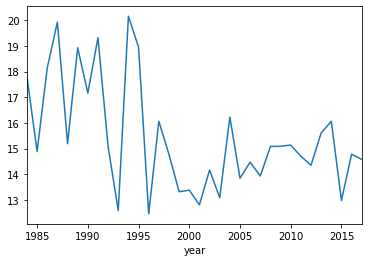

In [94]:
nova.mean().total.plot()

Iz grafa je razvidno, da so v povprečju nekoliko bolše rezultate dosegali v preteklosti. Ker smo prej pokazali, da število tekmovalcev čez 
leta narašča, lahko sklepamo, da večje število tekmovalcev ne vpliva najbolše na povprečen rezultat.
Sedaj se bomo omejeli le na tekmovalce, ki so prejeli medaljo. Zanimalo nas bo če je ta številka le bolj konstantna čez leta.

# Zaključek

Povzemimo ugotovitve naloge.

Število tekmovalcev čez leta narašča, a s tem tudi povprečni rezultati tekmovanja na leto. Največ tekmovalec je v večini iz bogatejših držav, ki nasplošno v znanost vlagajo več kot revnejše države. Kljub majhnosti Slovenije, imamo visoko število tekmovalcev, kar pomeni da imamo kar nekaj bistrih glavic glede na celotno populacijo. Čeprav so slovenski povprečni rezultati slabši od splošnega povprečja, imamo kar nekaj medalj. Pravtako se iz obeh povprečnih rezultatov, da razbrati, da so 3 in 6 naloga najtežji, medtem, ko se 1 in 4 naloga najbolje rešuje. Kot smo že omenili, se je uspeh danes nekoliko poslapšal. Čeprav bi lahko razlog bil, da so danes malo "težje" naloge, je rezultat prej povezanan z večjim številom tekmovalcev. 
